# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
df.info()
##333 rows
###15 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [4]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [5]:
# Calculate the average per capital crime rate per town.
df['crim'].mean()
##average crime rate per town is at a rate of 3.36

3.360341471471471

In [6]:
#Calculate the 90th percentile of teacher to student ratios by town
df['ptratio'].quantile(.9)

20.9

In [7]:
##Let's look at the unique median value of owner-occupied homes in $10000s.
df['medv'].unique()
len(df['medv'].unique())
##there are 192 unique values when looking at the median value of owner-occupied homes in $10000s

192

In [8]:
# Create 2 new dataframes based on a certain split for crime rate.
#average crime rate is about 3.36 (round to 3)
#would want to live somewhere where the crime rate is less than the average.
df.loc[df["crim"]< 3]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [9]:
##Let's create a dataframe with the highest crime rate so we know what to avoid
df.loc[df["crim"]> 3]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
97,143,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
234,357,8.98296,0.0,18.10,1,0.770,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8
235,358,3.84970,0.0,18.10,1,0.770,6.395,91.0,2.5052,24,666,20.2,391.34,13.27,21.7
236,359,5.20177,0.0,18.10,1,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48,22.7
237,360,4.26131,0.0,18.10,0,0.770,6.112,81.3,2.5091,24,666,20.2,390.74,12.67,22.6
238,361,4.54192,0.0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0
239,363,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666,20.2,380.79,10.19,20.8
240,366,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5
241,367,3.69695,0.0,18.10,0,0.718,4.963,91.4,1.7523,24,666,20.2,316.03,14.00,21.9
242,368,13.52220,0.0,18.10,0,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33,23.1


In [10]:
##Picking schools, we'd like to find a school with the lowest student to teacher ratio

df['ptratio'].quantile(.75)


20.2

In [11]:
df['ptratio'].max()

21.2

In [22]:
##want as close to the max as possible
df1 = df.loc[df["ptratio"]> 21]
df1

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
34,55,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9
87,128,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437,21.2,392.11,17.19,16.2
88,129,0.32543,0.0,21.89,0,0.624,6.431,98.8,1.8125,4,437,21.2,396.90,15.39,18.0
89,132,1.19294,0.0,21.89,0,0.624,6.326,97.7,2.2710,4,437,21.2,396.90,12.26,19.6
90,134,0.32982,0.0,21.89,0,0.624,5.822,95.4,2.4699,4,437,21.2,388.69,15.03,18.4
91,135,0.97617,0.0,21.89,0,0.624,5.757,98.4,2.3460,4,437,21.2,262.76,17.31,15.6
92,137,0.32264,0.0,21.89,0,0.624,5.942,93.5,1.9669,4,437,21.2,378.25,16.90,17.4
93,138,0.35233,0.0,21.89,0,0.624,6.454,98.4,1.8498,4,437,21.2,394.08,14.59,17.1
94,139,0.24980,0.0,21.89,0,0.624,5.857,98.2,1.6686,4,437,21.2,392.04,21.32,13.3
95,140,0.54452,0.0,21.89,0,0.624,6.151,97.9,1.6687,4,437,21.2,396.90,18.46,17.8


In [13]:
df['ptratio'].min()

12.6

In [20]:
##which ones to avoid
df2 = df.loc[df["ptratio"]< 15]
df2

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
97,143,3.32105,0.0,19.58,1,0.8710,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
98,146,2.37934,0.0,19.58,0,0.8710,6.130,100.0,1.4191,5,403,14.7,172.91,27.80,13.8
99,148,2.36862,0.0,19.58,0,0.8710,4.926,95.7,1.4608,5,403,14.7,391.71,29.53,14.6
100,149,2.33099,0.0,19.58,0,0.8710,5.186,93.8,1.5296,5,403,14.7,356.99,28.32,17.8
101,150,2.73397,0.0,19.58,0,0.8710,5.597,94.9,1.5257,5,403,14.7,351.85,21.45,15.4
102,151,1.65660,0.0,19.58,0,0.8710,6.122,97.3,1.6180,5,403,14.7,372.80,14.10,21.5
103,154,2.14918,0.0,19.58,0,0.8710,5.709,98.5,1.6232,5,403,14.7,261.95,15.79,19.4
104,155,1.41385,0.0,19.58,1,0.8710,6.129,96.0,1.7494,5,403,14.7,321.02,15.12,17.0
105,157,2.44668,0.0,19.58,0,0.8710,5.272,94.0,1.7364,5,403,14.7,88.63,16.14,13.1
106,159,1.34284,0.0,19.58,0,0.6050,6.066,100.0,1.7573,5,403,14.7,353.89,6.43,24.3


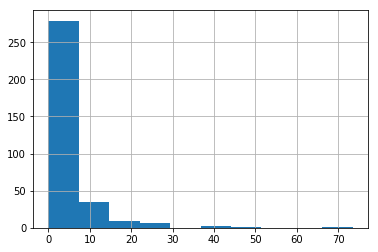

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df.crim.hist()
##most crime rates are well below 10

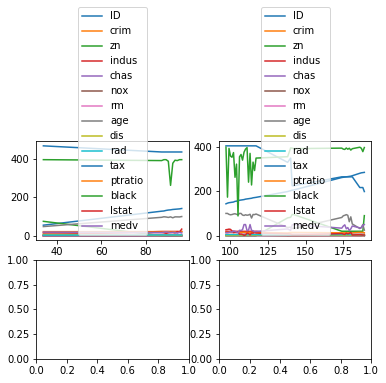

In [32]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)

df1.plot(ax=axes[0,0])
df2.plot(ax=axes[0,1])

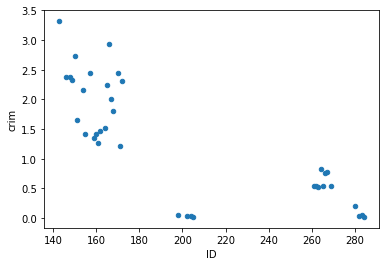

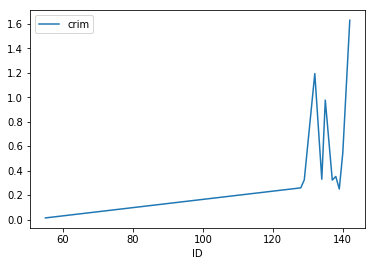

In [38]:
df2.plot(0,1, kind = 'scatter')
df1.plot(0,1, kind = 'line')

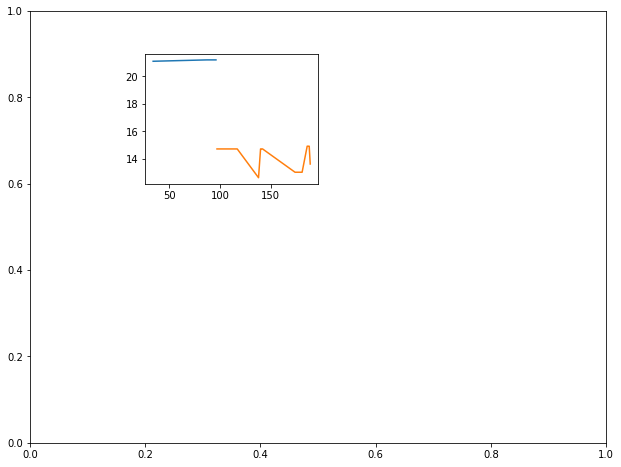

In [47]:
fig = plt.figure(figsize = (8,6))
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([.2,.6,.3,.3])

ax1 = df1['ptratio'].plot(kind="line")

ax2 = df2['ptratio'].plot(kind="line")



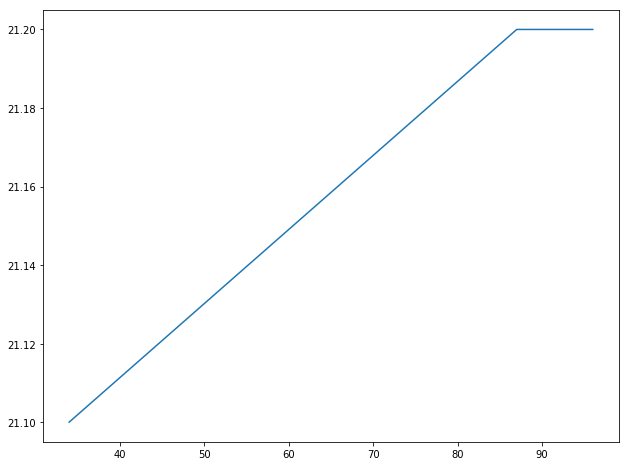

In [48]:
fig = plt.figure(figsize = (8,6))
ax1 = fig.add_axes([0,0,1,1])


ax1 = df1['ptratio'].plot(kind="line")


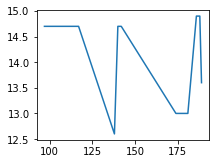

In [49]:
fig = plt.figure(figsize = (8,6))
ax2 = fig.add_axes([.2,.6,.3,.3])


ax2 = df2['ptratio'].plot(kind="line")

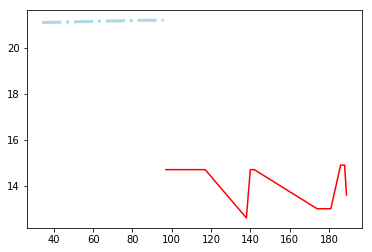

In [53]:
new_figure = plt.figure()
ax = new_figure.add_subplot(111)

ax.plot(df1['ptratio'], color='lightblue', linewidth=3, linestyle = '-.')

# Draw a scatter plot on same axes
ax.plot(df2['ptratio'], color='red', linewidth=1.5, linestyle = '-')

# Set the limits of x and y for axes

# Show the plot
plt.show()

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!